<a href="https://colab.research.google.com/github/NeuromatchAcademy/content-creation/blob/updates/Neuromatch_Tutorial_Format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial ?: Tutorial's name
**Week ?, Day ?: Name of the day**

**By Neuromatch Academy**

__Content creators:__ Name Surname, Name Surname, Day Lead's Name

__Content reviewers:__ Name Surname, Name Surname

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

**Our 2021 Sponsors, including Presenting Sponsor Facebook Reality Labs**

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

---
#Tutorial Objectives

Use a line (---) separator from title block to objectives. You should briefly introduce your content here in a few sentences. In this tutorial, you will learn what an NMA tutorial notebook should look like. 

Then have a few specific objectives for this tutorial, ideally [SMART goals](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5944406/#:~:text=1%20The%20mnemonic%20SMART%E2%80%94Specific,a%20well%2Dwritten%20learning%20objective.&text=Verbs%20such%20as%20understand%2C%20know,measurable%20and%20should%20be%20avoided.). By the end of this tutorial you will be able to:
*   Understand the format of an NMA tutorial
*   Make code exercises, interactive demos, and group discussions the correct structure




In [1]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
link_id = "kaq2x"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/kaq2x/


---
# Setup

In this section, we have:

1. **Install dependencies**: install specific to the tutorial libraries that are not included in the *requirements.txt` file in the repo.
2. **Import cell**: imports all libraries you use in the tutorial.
3. **Hidden Figure settings cell**: sets up the plotting style (copy exactly).
4. **Hidden Plotting functions cell**: contains all functions used to create plots throughout the tutorial (so students don't waste time looking at boilerplate matplotlib but can here if they wish to). Please use only matplotlib for plotting for consistency.
5. **Hidden Helper functions cell**: This should contain functions that students have previously used or that are very simple. Any helper functions that are being used for the first time and are important should be placed directly above the relevant text or exercise (see Section 1.1 for an example).

In [2]:
# @title Install dependencies

# @markdown **WARNING**: There may be *errors* and/or *warnings* reported during the installation. However, they are to be ignored.

!pip install pillow --quiet  # always use quiet

In [3]:
# Imports

# Import only the libraries/objects that you use in this tutorial. 

# If any external library has to be installed, !pip install library --quiet
# follow this order: numpy>matplotlib. 
# import widgets in hidden Figure settings cell

import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# @title Figure settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [19]:
# @title Plotting functions
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# You may have functions that plot results that aren't 
# particularly interesting. You can add these here to hide them. 

def plotting_z(z):
  """This function multiplies every element in an array by a provided value

  Args:
    z (ndarray): neural activity over time, shape (T, ) where T is number of timesteps
  
   """

  fig, ax = plt.subplots()

  ax.plot(z)
  ax.set(
      xlabel='Time (s)',
      ylabel='Z',
      title='Neural activity over time'
      )

In [6]:
# @title Helper functions

# If any helper functions you want to hide for clarity (that has been seen before
# or is simple/uniformative), add here
# If helper code depends on libraries that aren't used elsewhere,
# import those libaries here, rather than in the main import cell


In [7]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# for DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import numpy as np

def set_seed(seed=None):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  print(f'Random seed {seed} has been set.')


set_seed(seed=2023)  # change 2023 with any number you like

Random seed 2023 has been set.


In [8]:
# @title Set random seed, when using `pytorch`

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# for DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import torch
import numpy as np

def set_seed(seed=None, seed_torch=True):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


# In case that `DataLoader` is used
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)


set_seed(seed=2021, seed_torch=False)  # change 2021 with any number you like

Random seed 2021 has been set.


In [9]:
# @title Set device (GPU or CPU). Execute `set_device()`
# especially if torch modules used.

# inform the user if the notebook uses GPU or CPU.

def set_device():
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

---

# Section 1: Example of tutorial structure

The above section header should be a description of what the section covers

In [10]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

Text about the first concept. Don't make too long to reduce reading times during tutorial (extra text for later reference can go in appendix). Instead of long paragraphs, use bullet points of multiple shorter paragraphs. In both the videos and text, you should not "speak in variables." For example, don't say "change alpha", say "change the learning rate" or "change the learning rate, alpha".

## Section 1.1:  Different types of activities in an NMA tutorial (subsection header)

You can have students complete coding exercises, play with interactive demos, or have group discussions.

### Coding Exercise 1.1: Helpful exercise name (e.g., fitting a linear regression model)

This exercise fits in this subsection so is a level 3 header. We name it after the section it is in.

Very briefly summarize the exercise here. The first exercise should not be too difficult, to serve as a warm-up for students. Outputs of the code cell will ideally be a plot (so students can easily check against the correct one). In limited cases, the output may be printing numbers, text, etc. In that case you need to write the solution output manually after the exercise (E.g.: "You should see [4, 5, 6] when running the cell above").


Warn them when they will use a helper function. For example: In this exercise, you will also invoke `multiply_array` which multiplies an array by a scalar (a silly example).

**Note**: In case of randomness and to ensure reproducibility, do not forget to use a random seed before the exercise or within the function.

In [11]:
# @markdown *Execute this cell to enable the array multiplication function: `multiply_array`*


def multiply_array(x, c, seed):
  """Multiply every element in an array by a provided value

  Args:
    x (ndarray): An array of shape (N,) 
    c (scalar): multiplicative factor
    seed (integer): random seed

  Returns:
    ndarray: output of the multiplication 
  """
  np.random.seed(seed)
  y = x * c + 4*np.random.randn()

  return y

__Editor guideline:__ the above structure allows us to make the notebooks cleaner by hiding functions but still keep relevant functions close to where students will encounter them. Make sure to have the function in the markdown text so it's searchable.

In [20]:
def generic_function(x, seed):
  """Google style doc string. Brief summary of what function does here
  
  Args:
    x (ndarray): An array of shape (N,) that contains blah blah
    seed (integer): random seed for reproducibility

  Returns:
    ndarray: The output is blah blah
  """
  #################################################
  ## TODO for students: details of what they should do ##
  # Fill out function and remove
  raise NotImplementedError("Student exercise: say what they should have done")
  #################################################
  
  # Have a comment for every line of code they need to write, and when possible have
  # variables written with ellipses where they should fill in or ellipses where they should
  # fill in inputs to functions
  y = multiply_array(..., 5, seed)

  # Another comment because they need to add another line of code
  z = ...

  return z


x = np.array([4, 5, 6])

# We usually define the plotting function in the hidden Helper Functions
# so students don't have to see a bunch of boilerplate matplotlib code
## Uncomment the code below to test your function
z = generic_function(x, seed)
plotting_z(z)

---
**Editor guideline for exercise solution formatting:**
- the presence of `# to_remove solution` in the first line of solution block
- The absence of the fenced (`#####`) block that raises a `NotImplementedError`
- Valid code replacing all ellipses (`...`)
- Code that uses or depends on the completed function/lines is uncommented
- Plotting code is indented under a `with plt.xkcd():` context manager.
- **All other comments and code should be identical**
---

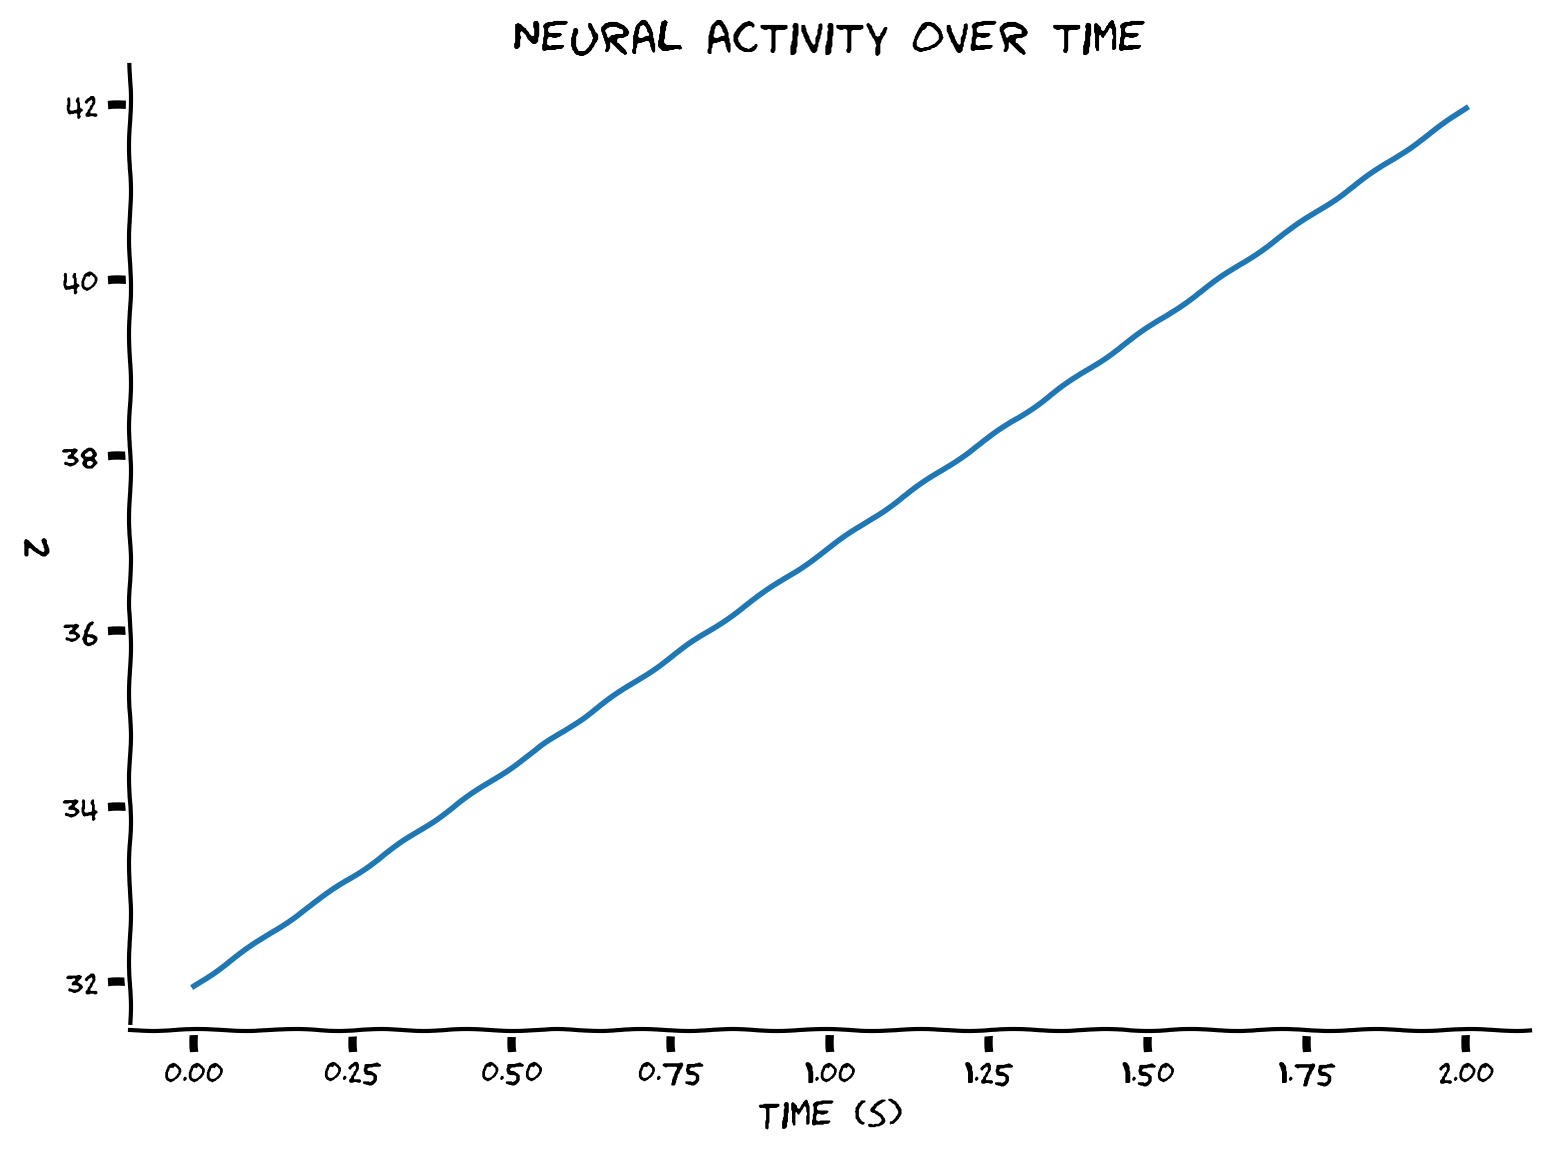

In [22]:
# to_remove solution
def generic_function(x, seed):
  """Google style doc string. Brief summary of what function does here
  
  Args:
    x (ndarray): An array of shape (N,) that contains blah blah
    seed (integer): random seed for reproducibility

  Returns:
    ndarray: The output is blah blah
  """

  # Have a comment for every line of code they need to write, and when possible have
  # variables written with ellipses where they should fill in or ellipses where they should
  # fill in inputs to functions
  y = multiply_array(x, 5, seed)

  # Another comment because they need to add another line of code
  z = y + 6

  return z


x = np.array([4, 5, 6])

# We usually define the plotting function in the hidden Helper Functions
# so students don't have to see a bunch of boilerplate matplotlib code
## Uncomment the code below to test your function
z = generic_function(x, seed=2021)
with plt.xkcd():
  plotting_z(z)

### Interactive Demo 1.1: Name of demo

Here, we will demonstrate how to create a widget if you would like to use a widget to demonstrate something. Make sure the use a @title cell and hide the contents by default, because the code to make the widget is often pretty ugly and not important for the students to see. 

If the widget makes use of a function that must be completed as part of an exercise, you may want to re-implement the correct version of the function inside the widget cell, so that it is useful for a student who got completely stuck.

There should be specific questions asked about the demo (e.g. what happens when you do this?)

interactive(children=(FloatSlider(value=0.0, description='mean', max=10.0, min=-10.0, step=0.5), FloatSlider(v…

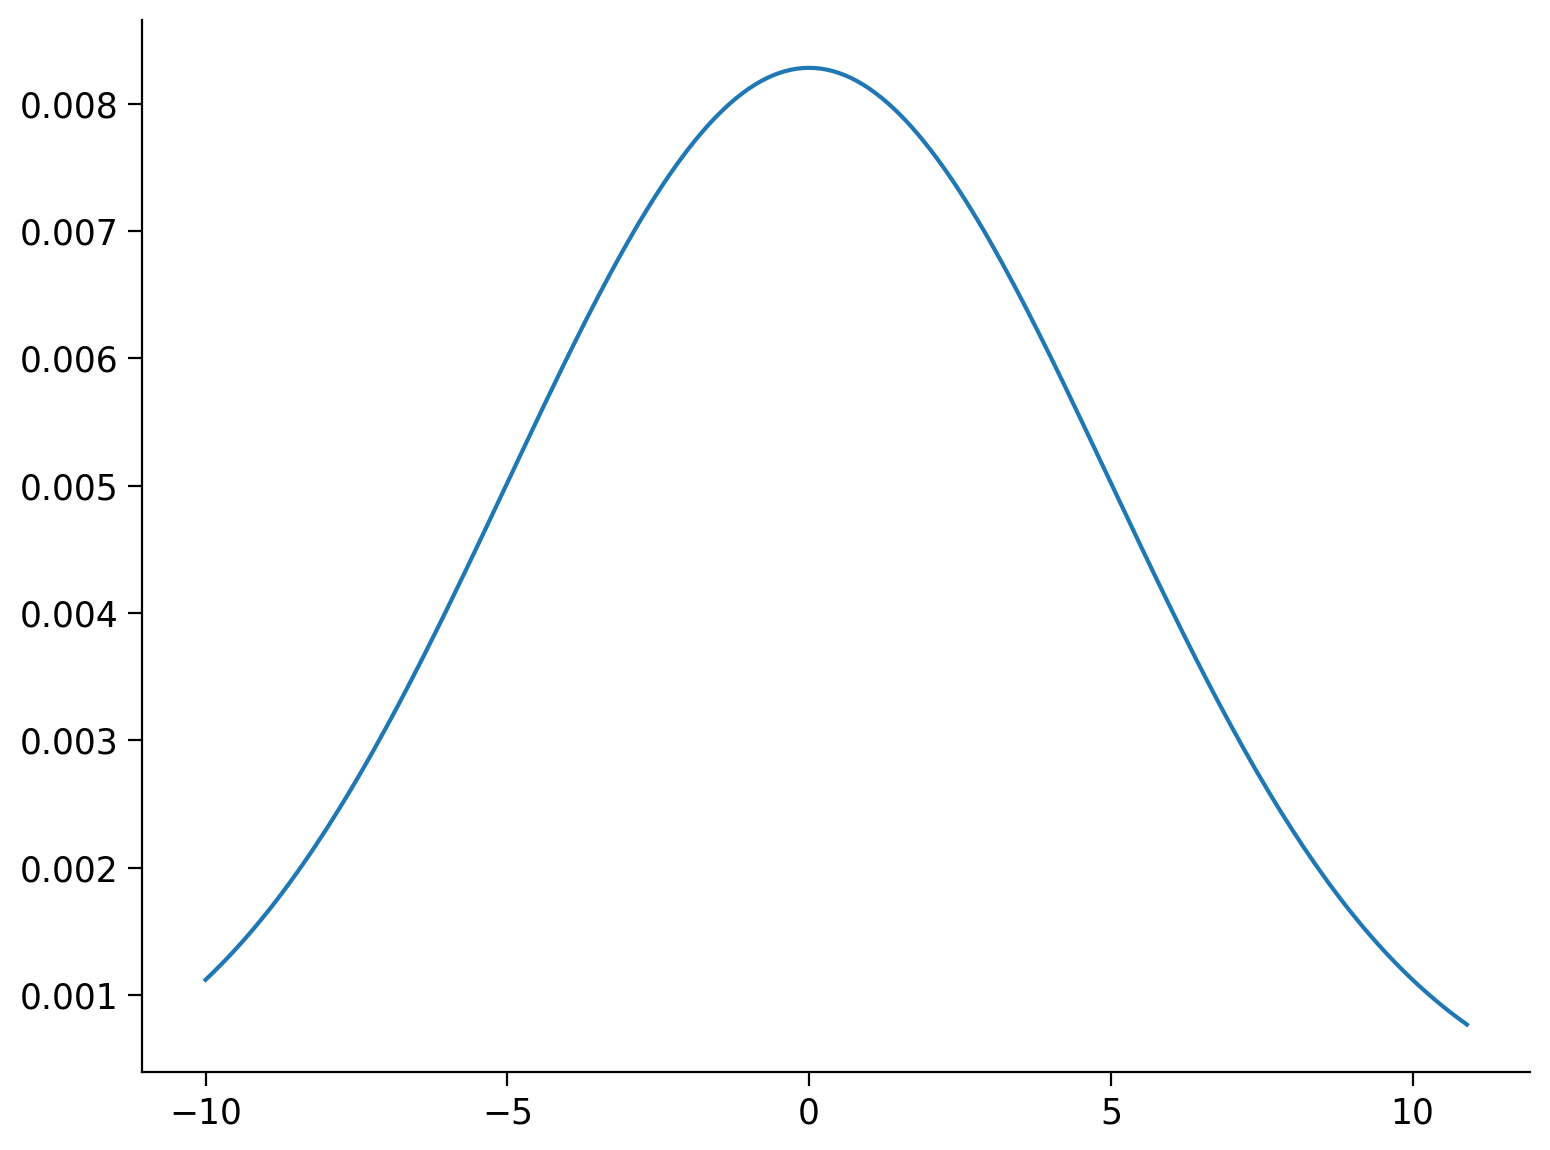

In [14]:
# @markdown Make sure you execute this cell to enable the widget!

x = np.arange(-10, 11, 0.1)


def gaussian(x, mu, sigma):
  px = np.exp(-1 / 2 / sigma**2 * (mu - x) ** 2)
  px = px / px.sum()
  return px


@widgets.interact
def plot_gaussian(mean=(-10, 10, .5), std=(.5, 10, .5)):
  plt.plot(x, gaussian(x, mean, std))

In [15]:
# to_remove explanation

"""
Discussion: Write a dicussion about/answers to any open-ended questions you pose (either about a demo or elsewhere)

You can write a paragraph or two of nice didactic text
within a single comment. 
""";

__Editor guideline:__ note that the form header for the cell above is __to_remove explanation__, not __to_remove solution__.

maybe some more text about what exercises showed (if helpful). 
The Gaussian is: 
- bumpy in the middle
- symmetric
- almighty

### Think! 1.1: Name of discussion topic

In addition to code exercises and interactive demos, you can have "discussion exercises" where students discuss open-ended questions. Each should roughly replace a code exercise so take about 10 minutes.

E.g.: What do you think contributes to a good learning experience? Take 2 minutes to think in silence, then discuss as a group (~10 minutes).

**Important**: NMA DL ONLY (not for NMA-CN): You can then include an airtable form through which students can write down their thoughts. This helps us to see how students are thinking (as we can read the responses). You should also still include the explanation cell with the answer or some discussion to aid students.

In [16]:
# airtable
# relevant_variable_name: text 

__Editor guideline:__ note that to notify us where you'd like an airtable input form, use this special syntax. The first line is "# 

*   First line is `# airtable`
*   Relevant variable name on the second line should be something related to the question you're asking (an identifier). For example it could be "learning_experience_contribs" in this example. It should be a valid Python variable (no spaces, don't start with numbers).
*   You can have different types of inputs: text, numerical, or multiple choice.
    * If you want a text answer, use `# relevant_variable_name: text`
    * If you want a numerical answer, use `# relevant_variable_name: number`
    * If you want a multiple choice answer, use `# relevant_variable_name: [option1, option2, option3]` where you fill out what the options are. For example, `# network_arch: [MLP, CNN, RNN, Transformer]`


In [17]:
# to_remove explanation

"""
Discussion: Write a dicussion about/answers to any open-ended questions you pose (either about a demo or elsewhere)

You can write a paragraph or two of nice didactic text
within a single comment. 
""";

## Section 1.2: Name

### Coding Exercise 1.2: Name

This exercise is in a subsection so has a level 3 header

---
# Section 2: Notation Standards

For the comp neuro course, our math notation standards so far are located [here](https://docs.google.com/spreadsheets/d/11YXS39tIQb_x-wLNbbGBu1uQ9Dl4drBqUQbKpw0BQbc/edit?pli=1#gid=1974724555) (accessible from a neuromatch account). This is a work in progress so check back later. 

For the deep learning course, we will be using [this notation](https://www.deeplearningbook.org/contents/notation.html). You can find and use the latex [here](https://github.com/goodfeli/dlbook_notation/blob/master/notation.tex).

---
# Section 3: An additional example section

Separate with lines and add more content here! Depending on how the videos were created, you may or may not have a separate video for each section

In [18]:
# @title Video 2: Video 2 Name
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')  
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

## Coding Exercise 3: Name

This exercise is in this section (not in a subsection) so has a level 2 header.

---
# Section 4: DataLoader deterministically used for DL with Pytorch

DataLoader will reseed workers following [Randomness in multi-process data loading algorithm](https://pytorch.org/docs/stable/data.html#data-loading-randomness). Use `worker_init_fn()` and generator to preserve reproducibility:

```python
g = torch.Generator()
g.manual_seed(2021)

DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    worker_init_fn=seed_worker,
    generator=g,
)
```

---
# Summary

Have a summary of what they learned with specific points.

* Specific point A

* Specific point B

---
# Bonus: Name of Bonus section

Add extra text that you want students to have for reference later but that will make reading times too long during tutorials. You can have multiple Bonus sections if you'd like, just number them as Bonus 1: Name, Bonus 2: Name, etc. 

You should not have bonus content interleaved into the tutorial.